## Part 1 - Image Segmentation

##### Image segmentation is a process of partitioning a digital image into multiple segments, often referred to as "superpixels". The objective of segmentation is to simplify or change the representation of an image into something more meaningful and easier to analyze.<br>
#### Image segmentation is typically used to locate objects and boundaries in images. It could be used in various fields, such as: <br>
* ***Medical Imaging: Identifying different structures in biological data like tumors, arteries,
organs, etc.***
* ***Self-driving cars: Understanding the surrounding environment by identifying objects***
like pedestrians, other vehicles, and road signs.
* ***Computer Vision: Separating foreground from the background, identifying objects for
tracking, recognizing shapes, etc.***

##### In the context of the assignment, we're using image segmentation to partition an image into regions that have similar colors. <br>
##### This could be used, for example, to separate an object of interest from the background based on its color characteristics and identify specific areas with different colors.

In [1]:
from skimage import io
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
'''Load the image and check its shape'''
image = io.imread('brain.png') # Load the image
print(f"Image is of type: {type(image)}\nThis image has a shape: {image.shape}") # shape is the dimensions of the image

Image is of type: <class 'numpy.ndarray'>
This image has a shape: (512, 512, 3)


#### This shape indicates the image is 512 pixels wide, 512 pixels tall, and has 3 channels (RGB).

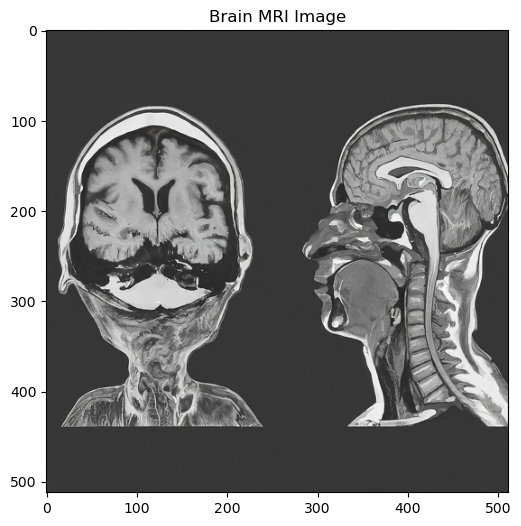

In [3]:
'''Display the image and plot it'''
plt.figure(figsize=(6,6)) # Set the size of the plot
plt.imshow(image) # Display the image
plt.title(label='Brain MRI Image') # Set the title of the plot
plt.show() # Show the image

In [4]:
'''Normalize the image'''
img_normalized = image / 255.0 # Normalize the image
print(f"The image has the largest pixel value of 255 and we can normalize the image data by dividing by 255:\n{img_normalized}")

The image has the largest pixel value of 255 and we can normalize the image data by dividing by 255:
[[[0.21960784 0.21568627 0.21960784]
  [0.21960784 0.21960784 0.21568627]
  [0.21960784 0.21568627 0.21568627]
  ...
  [0.21176471 0.21568627 0.21176471]
  [0.21176471 0.21568627 0.21176471]
  [0.21176471 0.21568627 0.21176471]]

 [[0.21568627 0.21176471 0.21568627]
  [0.21568627 0.21568627 0.21960784]
  [0.21568627 0.21176471 0.21176471]
  ...
  [0.21176471 0.21176471 0.21176471]
  [0.21568627 0.21176471 0.21176471]
  [0.21176471 0.21568627 0.21176471]]

 [[0.21176471 0.21176471 0.21176471]
  [0.21568627 0.21568627 0.21568627]
  [0.21568627 0.21176471 0.21176471]
  ...
  [0.21568627 0.21568627 0.21568627]
  [0.21176471 0.21568627 0.21568627]
  [0.21568627 0.21568627 0.21568627]]

 ...

 [[0.21568627 0.21568627 0.21176471]
  [0.21568627 0.21568627 0.21176471]
  [0.21568627 0.21960784 0.21176471]
  ...
  [0.21568627 0.21568627 0.21568627]
  [0.21568627 0.21568627 0.21960784]
  [0.2196078

In [5]:
'''Reshape the image'''
pixels_per_channel = image.shape[0] * image.shape[1] # Get the number of pixels per channel (height x width)
print(f"{pixels_per_channel} pixels per channel") # Number of pixels per channel
reshaped_image = img_normalized.reshape(pixels_per_channel,3) # Reshape the image to have 3 channels
print(reshaped_image, reshaped_image.shape) # Display the reshaped image

262144 pixels per channel
[[0.21960784 0.21568627 0.21960784]
 [0.21960784 0.21960784 0.21568627]
 [0.21960784 0.21568627 0.21568627]
 ...
 [0.21176471 0.21568627 0.21568627]
 [0.21176471 0.21568627 0.21568627]
 [0.21176471 0.21568627 0.21176471]] (262144, 3)


In [6]:
'''Scale the reshaped image'''
scaler = StandardScaler() # Create a StandardScaler object
scaled_image = scaler.fit_transform(reshaped_image) # Scale the reshaped image
print(f"Scaled Reshaped Image Data:\n\n{scaled_image}") # Display the scaled DataFrame

Scaled Reshaped Image Data:

[[-0.62303969 -0.64079758 -0.62279564]
 [-0.62303969 -0.62225345 -0.6413623 ]
 [-0.62303969 -0.64079758 -0.6413623 ]
 ...
 [-0.66014628 -0.64079758 -0.6413623 ]
 [-0.66014628 -0.64079758 -0.6413623 ]
 [-0.66014628 -0.64079758 -0.65992895]]


In [7]:
'''Fit the reshaped data using KMeans'''
# Fit model on original scaled data to generate 3 cluster centers (centroids) and cluster numbers to the data points
kmeans = KMeans(n_clusters=5).fit(scaled_image)
# Gives us the coordinates of the 3 cluster centers (centroids)
print(f"These are the n-dimensional coordinates of the 4 centroids:\n{kmeans.cluster_centers_}")
# Gives us the cluster number each data point belongs to
print(f"These are the cluster number each data point belongs to:\n\n{kmeans.labels_}")

These are the n-dimensional coordinates of the 4 centroids:
[[-0.64524309 -0.64542022 -0.64514357]
 [ 1.51196421  1.51336293  1.51327925]
 [ 0.19208069  0.19252613  0.19109996]
 [ 2.45117911  2.44896632  2.45037156]
 [ 0.82696567  0.82778026  0.82626803]]
These are the cluster number each data point belongs to:

[0 0 0 ... 0 0 0]


In [8]:
'''Define the 4 colors for the 4 clusters'''
colors = np.array([
    [255, 0, 0],   # Red
    [0, 0, 0],     # Black
    [0, 255, 0],   # Green
    [0, 0, 255],   # Blue
    [255, 255, 0]  # Yellow
])/255.0 # Normalize the colors

In [9]:
'''Replace the reshaped pixels with kmeans.labels_ having the same color'''
# Apply the colors to the image based on cluster labels
segmented_img = np.zeros_like(scaled_image)
for i in range(len(scaled_image)):
    segmented_img[i] = colors[kmeans.labels_[i]]

In [10]:
'''Reshape the segmented image to the shape of the original image'''
segmented_img = segmented_img.reshape(image.shape)

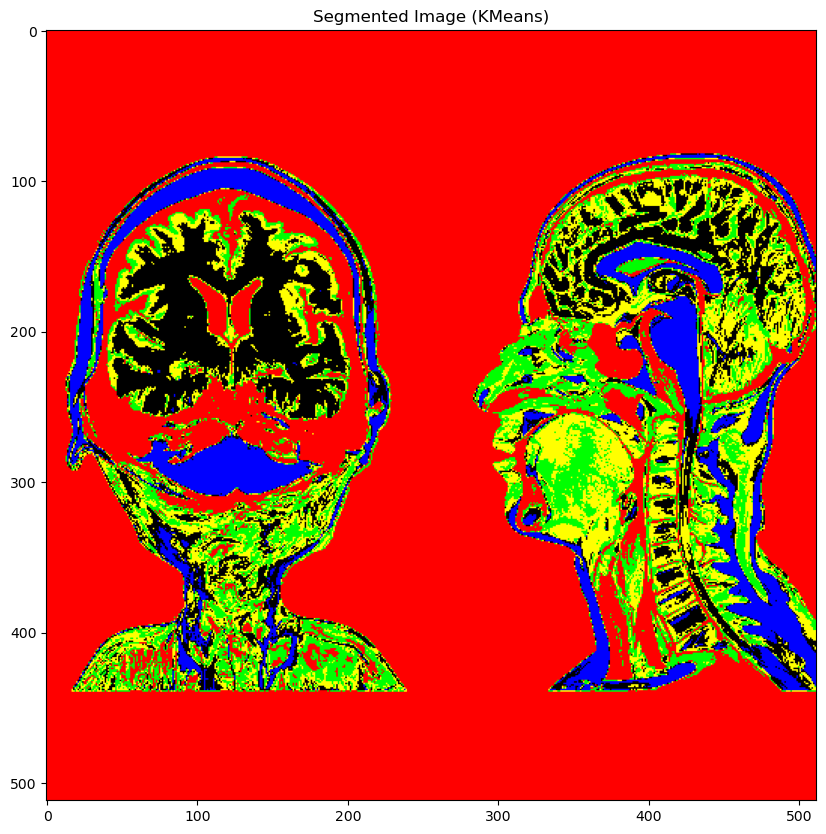

In [11]:
'''Plot the segmented image'''
plt.figure(figsize=(10, 10))
plt.imshow(segmented_img)
plt.title('Segmented Image (KMeans)')
plt.show()

***What do you see as the main differene between the original and segmeneted image?*** <br>
* Ans) The segmented image is color coded by different clusters of the image that are most similar to eachother while the original imageis a black and white image that is shaded by how the picture looks in real life where lighter areas are whiter and darker areas are blacker.

***If you tried to reduce the number of clusters to say 4 to 2, what changes do you see?***
* Ans) Reducing the clusters from 4 to 2 will simplify the segmentation into two major regions, which would merge some of the distinct regions that were seperated with 4 clusters. The image looses some of its details as colors are combined, making the image less granular and increase innacuracy as it would be harder to identify different segments of the brain.

***Describe in a line or two, your understanding of image segmentation after seeing the visuals.***
* Ans) My understanding of image segmentation is that it color codes the image into different segments to better identify anomalies within sections utilizing machine learning and the kmeans algorithm.